# Analysis 3 data visualisation



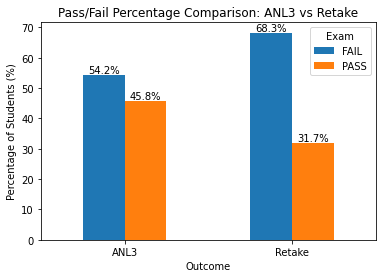

In [11]:
import pandas as pd
import os
import matplotlib.pyplot as plt

student_file = os.path.join("..", "data", "processed", "ANL3_FULLY_MERGED.xlsx")
df_ANL3 = pd.read_excel(student_file)



total_students = len(df_ANL3)
anl3_percentages = df_ANL3['ANL3 Fc Outcome'].value_counts(normalize=True) * 100
anl3_retake_percentages = df_ANL3['ANL3 Sc Outcome'].value_counts(normalize=True) * 100

comparison_df = pd.DataFrame({
    'ANL3': anl3_percentages,
    'Retake': anl3_retake_percentages
}).T
ax = comparison_df.plot(kind='bar', stacked=False)

# Add labels and title
plt.title('Pass/Fail Percentage Comparison: ANL3 vs Retake')
plt.xlabel('Outcome')
plt.ylabel('Percentage of Students (%)')
plt.xticks(rotation=0)
plt.legend(title='Exam')


for p in ax.patches:
    height = p.get_height()
    
    
    ax.annotate(f'{height:.1f}%', 
                (p.get_x() + p.get_width() / 2., height),  
                ha='center', va='center', xytext=(0, 5),  
                textcoords='offset points')
plt.show()

# Average percentage of questions answered right per section of the exam FC

<Figure size 720x360 with 0 Axes>

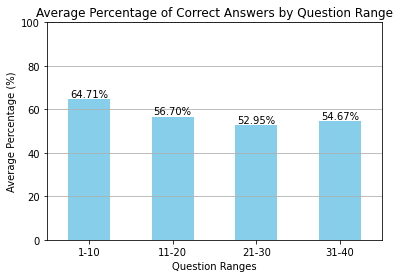

In [79]:
import pandas as pd
import os
import matplotlib.pyplot as plt

student_file = os.path.join("..", "data", "raw", "INFANL2-2020-2021 EXAM first chance.xlsx")
df_ANL3 = pd.read_excel(student_file, sheet_name="Grades")

filtered_df = df_ANL3[df_ANL3['Group'] == 'Average'].iloc[:, 3:43]

filtered_df = filtered_df.transpose()

num_questions = filtered_df.shape[0]
section_size = num_questions // 4

averages = [
    (filtered_df.iloc[i*section_size:(i+1)*section_size].mean() * 100).round(2)
    for i in range(4)
]

x_labels = [
    f"{i*section_size + 1}-{(i + 1) * section_size}" for i in range(4)
]

average_df = pd.DataFrame(averages)

# Plot the results
plt.figure(figsize=(10, 5))
bars = average_df.plot(kind='bar', legend=False, color='skyblue')

for bar in bars.patches:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}%', 
                 (bar.get_x() + bar.get_width() / 2, height), 
                 ha='center', va='bottom') 

plt.title('Average Percentage of Correct Answers by Question Range')
plt.xlabel('Question Ranges')
plt.ylabel('Average Percentage (%)')
plt.xticks(ticks=range(len(x_labels)), labels=x_labels, rotation=0)
plt.grid(axis='y')
plt.ylim(0, 100)
plt.show()


# Average percentage of questions answered right per section of the exam SC


<Figure size 720x360 with 0 Axes>

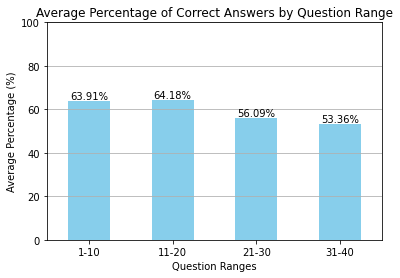

In [77]:
import pandas as pd
import os
import matplotlib.pyplot as plt


student_file = os.path.join("..", "data", "raw", "INFANL1-2020-2021 EXAM second chance.xlsx")
df_ANL3 = pd.read_excel(student_file, sheet_name="Grades")


filtered_df = df_ANL3[df_ANL3['Group'] == 'Average'].iloc[:, 3:43]


filtered_df = filtered_df.transpose()

num_questions = filtered_df.shape[0]
section_size = num_questions // 4


averages = [
    (filtered_df.iloc[i*section_size:(i+1)*section_size].mean() * 100).round(2)
    for i in range(4)
]


x_labels = [
    f"{i*section_size + 1}-{(i + 1) * section_size}" for i in range(4)
]

average_df = pd.DataFrame(averages)


plt.figure(figsize=(10, 5))
bars = average_df.plot(kind='bar', legend=False, color='skyblue')


for bar in bars.patches:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}%', 
                 (bar.get_x() + bar.get_width() / 2, height), 
                 ha='center', va='bottom')

plt.title('Average Percentage of Correct Answers by Question Range')
plt.xlabel('Question Ranges')
plt.ylabel('Average Percentage (%)')
plt.xticks(ticks=range(len(x_labels)), labels=x_labels, rotation=0)
plt.grid(axis='y')
plt.ylim(0, 100) 
plt.show()